# Part A

01) Import Required Libraries
* Import numpy, matplotlib, keras utilities, and sklearn.model_selection.
* Briefly explain the role of each (e.g., NumPy for arrays, Matplotlib for visualization,Keras for deep learning).

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LeakyReLU
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

02) Load the Dataset
* Use the Fashion MNIST dataset from keras.datasets.
* Print the shapes of training and testing data.
* Why is it useful to check dataset shapes before model training?

In [2]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

print("Training data shape: ", train_X.shape, train_y.shape) 
print("Testing data shape: ", test_X.shape, test_y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


03) Visualize a Sample
* Display the first training image with its label.
* Why is visualization of data important before training a model?

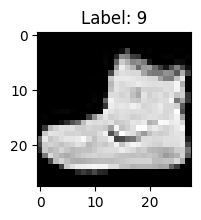

In [3]:
plt.figure(figsize=(2,2))
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title(f"Label: {train_y[0]}")
plt.show()

04) Data Reshaping and Normalization
* Reshape training and test images to include the channel dimension (28, 28, 1).
* Convert pixel values to float and normalize to the range [0, 1].
* Explain why normalization is important in deep learning.

In [4]:
train_X = train_X.reshape(len(train_X), 28, 28, 1)
test_X = test_X.reshape(len(test_X), 28, 28, 1)


In [5]:
# Normalize
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

05) Convert Labels to One-Hot Encoding
* Convert categorical class labels into one-hot vectors using to_categorical.
* Show an example of original vs one-hot encoded labels.

In [6]:
# from keras.utils import to_categorical
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

06) Create a Validation Set
* Use train_test_split to divide training data into train and validation sets (80/20 split).
* Why is validation data needed in addition to testing data?

In [8]:
train_X, valid_X, train_label, valid_label = train_test_split(
    train_X, train_y_one_hot, test_size=0.2, random_state=0
)

# Part B

01) Set Hyperparameters
* Define batch_size, epochs, and num_classes.
* What does each of these control in the training process?

In [9]:
batch_size = 64
epochs = 20
num_classes = 10

02) Build a CNN Model
* Construct a Sequential model with the following:

    o Conv2D (32 filters, 3×3, linear activation, same padding) + LeakyReLU

    o MaxPooling2D (2×2)

    o Conv2D (64 filters) + LeakyReLU + MaxPooling2D

    o Conv2D (128 filters) + LeakyReLU + MaxPooling2D

    o Flatten

    o Dense (128 units, linear activation) + LeakyReLU

    o Dense (num_classes, softmax output)
    
* Draw a diagram of the architecture.

In [10]:
model = Sequential()
model.add(
    Conv2D(
        32,
        kernel_size=(3, 3),
        activation="linear",
        input_shape=(28, 28, 1),
        padding="same",
    )
)
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(64, (3, 3), activation="linear", padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="linear", padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=CategoricalCrossentropy, optimizer=Adam(), metrics=["accuracy"])

model.summary()

c:\Users\pkmpp\OneDrive\Documents\python\env\venv_TensorFlow_cpu_1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\pkmpp\OneDrive\Documents\python\env\venv_TensorFlow_cpu_1\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

03) Compile the Model
* Compile the model using Adam optimizer and categorical crossentropy loss.
* Justify the choice of optimizer and loss function for this multi-class classification
task.

# Part C

01) Fit the Model
* Train the model on the training set with the defined hyperparameters.
* Use validation data to monitor performance.
* Plot training and validation accuracy/loss curves.

In [11]:
result = model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8315 - loss: 0.4648 - val_accuracy: 0.8815 - val_loss: 0.3227
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8957 - loss: 0.2863 - val_accuracy: 0.8927 - val_loss: 0.2910
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9120 - loss: 0.2414 - val_accuracy: 0.8997 - val_loss: 0.2879
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9232 - loss: 0.2076 - val_accuracy: 0.9158 - val_loss: 0.2327
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9331 - loss: 0.1821 - val_accuracy: 0.9158 - val_loss: 0.2317
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9402 - loss: 0.1604 - val_accuracy: 0.9188 - val_loss: 0.2308
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9477 - loss: 0.1395 - val_accuracy: 0.9225 - val_loss: 0.2250
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9551 - loss: 0.1215 - 

02) Evaluate on Test Data
* Evaluate the trained CNN using the test dataset.
* Report the test accuracy and test loss.
* Why might test accuracy differ from validation accuracy?

In [12]:
test_eval = model.evaluate(test_X, test_y_one_hot)
print("Test Loss:", test_eval[0])
print("Test Accuracy:", test_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9201 - loss: 0.4657
Test Loss: 0.465680867433548
Test Accuracy: 0.9200999736785889


03) Predictions (Optional Extension)
* Predict labels for a few test images and visualize them with predicted class titles.
* Discuss any misclassifications observed.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [25]:
# Make predictions on the test set
predictions = model.predict(test_X)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_y_one_hot, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


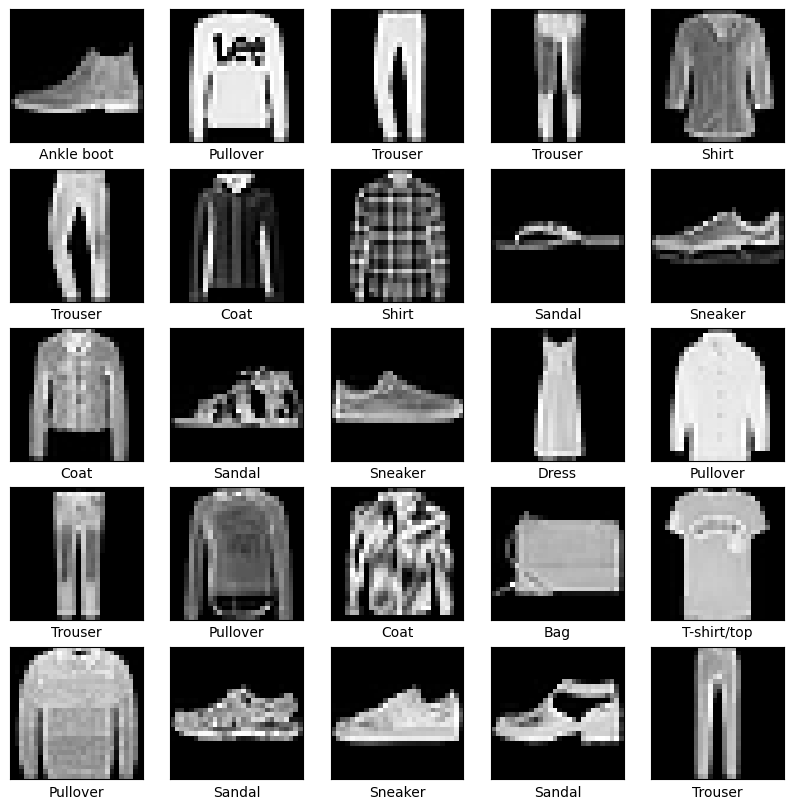

In [26]:
# visualize the dataset and the class names

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_X[i].reshape(28, 28), cmap="gray")
    plt.xlabel(class_names[predicted_classes[i]])
plt.show()

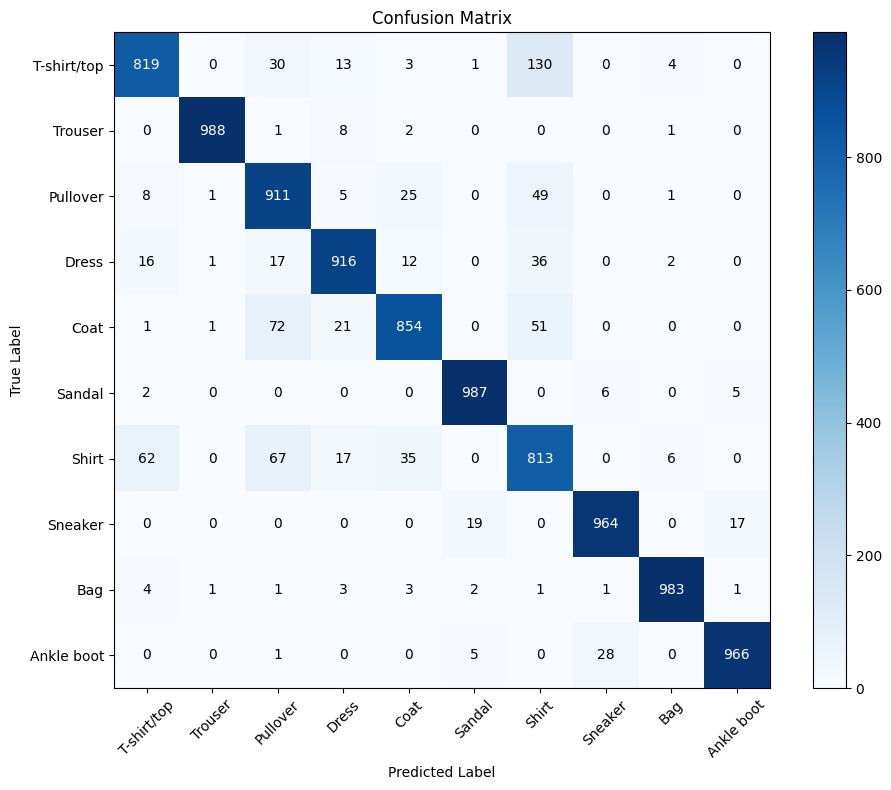

In [27]:

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Optional: Add text annotations for each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()